# Credit Card Dataset

The dataset can be found [here](https://www.kaggle.com/code/nataliaole/cc-general-clustering/data). 

There is no Target Variable in this dataset, and as such, we cannot use classification performance metrics to evaluate the dataset. 

We can find the optimal number of clusters of KMeans using two distinct methods - 
1. Elbow Method
2. Silhouette Analysis

For the case of Agglomerative Clustering, we utilize a dendrogram to find the optimal number of clusters.

# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Credit Card Dataset/CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


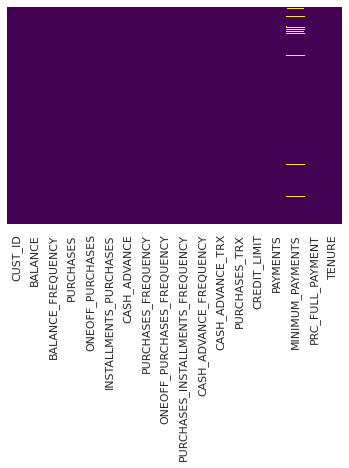

In [5]:
sns.heatmap(data.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

We drop the Customer ID and then handle the missing values in Minimum Payments.

In [6]:
data.drop('CUST_ID', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
data['MINIMUM_PAYMENTS'].unique()

array([ 139.509787, 1072.340217,  627.284787, ...,   82.418369,
         55.755628,   88.288956])

In [8]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())
data['CREDIT_LIMIT'].unique()

array([ 1000.      ,  7000.      ,  7500.      ,  1200.      ,
        1800.      , 13500.      ,  2300.      , 11000.      ,
        2000.      ,  3000.      ,  8000.      ,  2500.      ,
       13000.      ,  4000.      , 11250.      ,  9000.      ,
        6000.      ,  1700.      , 10500.      ,  6900.      ,
        5000.      ,  4500.      ,  1500.      ,  8500.      ,
        2400.      ,  4200.      ,  3300.      , 12000.      ,
        3500.      ,  6500.      ,  1600.      ,  4150.      ,
        1850.      ,  6250.      ,  2250.      ,  9500.      ,
       16500.      ,  5700.      ,  5500.      , 17000.      ,
        3200.      , 19000.      ,  2800.      , 18000.      ,
       21500.      , 10000.      , 20000.      ,  7900.      ,
       15000.      , 12500.      , 14000.      ,  5300.      ,
         900.      ,  6150.      , 11500.      , 23000.      ,
        2700.      , 14500.      , 19500.      ,  1400.      ,
        2900.      ,  1950.      ,  7200.      , 10950.

In [9]:
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

We have handled the missing values. 

For clustering, we only take a subset of the dataset, for example - the first 1000 rows:

In [10]:
data_copy = data.loc[:999, :]
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           1000 non-null   float64
 1   BALANCE_FREQUENCY                 1000 non-null   float64
 2   PURCHASES                         1000 non-null   float64
 3   ONEOFF_PURCHASES                  1000 non-null   float64
 4   INSTALLMENTS_PURCHASES            1000 non-null   float64
 5   CASH_ADVANCE                      1000 non-null   float64
 6   PURCHASES_FREQUENCY               1000 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        1000 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  1000 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            1000 non-null   float64
 10  CASH_ADVANCE_TRX                  1000 non-null   int64  
 11  PURCHASES_TRX                     1000 non-null   int64  
 12  CREDIT_

## Correlation Matrix

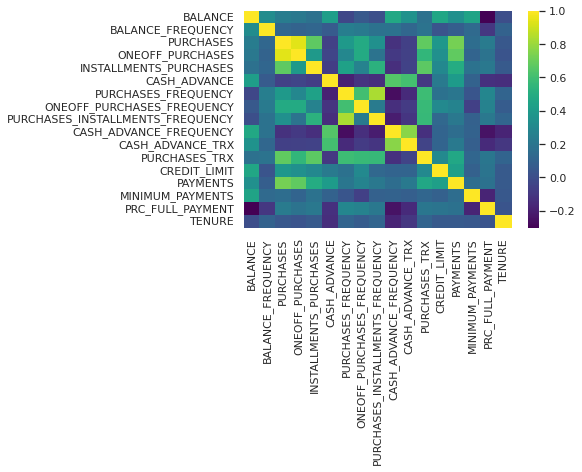

In [11]:
sns.heatmap(data_copy.corr(), cmap = 'viridis')

There are no noteworthy correlations.

## Normalization

In [12]:
from sklearn.preprocessing import normalize
data_normalized = normalize(data_copy)
normalized_df = pd.DataFrame(data_normalized, columns = data_copy.columns)
normalized_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.207829,0.000079,0.186921,0.186921,0.00000,0.025661,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.00000,0.001496
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


# KMeans Clustering

## WCSS | Elbow Method

We first check the Within Cluster Sum of Squares to understand an optimal number of clusters. Note that this is a trail and error 'Elbow' method.

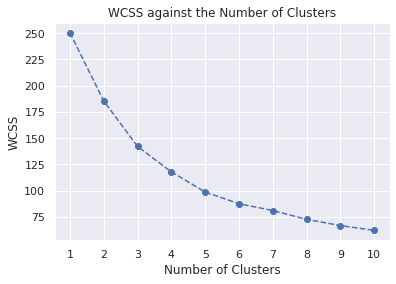

In [13]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 11):
  kmeans  = KMeans(n_clusters = i, random_state = 42)
  kmeans.fit(normalized_df)
  WCSS.append(kmeans.inertia_)

plt.plot(range(1, 11), WCSS, 'o--')
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS against the Number of Clusters')
plt.show()

It seems that 5 or 6 clusters would be a good measure.

## Silhouette Analysis

Instead of guessing the optimal number of clusters, we can use the silhouette scores for a number of clusters and choose the cluster that gives the highest score.

We calculate the Silhouette score, which ranges from -1 to 1. A silhouette score of 1 implies that the clusters and well-distinguished from each other.

In [14]:
from sklearn.metrics import silhouette_score

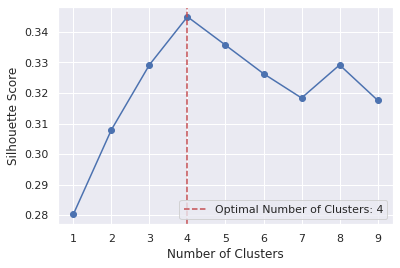

In [15]:
X = normalized_df.values
kmeans_per_k  = [KMeans(n_clusters = i, random_state = 42).fit(X) for i in range(1, 11)]
silhouette_scores = [silhouette_score(X, kmean.labels_) for kmean in kmeans_per_k[1:]]

k = np.argmax(silhouette_scores) + 1
plt.plot(range(1, len(silhouette_scores)+1), silhouette_scores, marker = 'o')
plt.axvline(x = k, linestyle = '--', c = 'r', label = 'Optimal Number of Clusters: {}'.format(k))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

Although the Silhouette Score is not good enough in our case, it still points out that the optimal number of clusters is 04.

We use this information in the KMeans Algorithm:

In [16]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42) 
y_kmeans = kmeans.fit_predict(normalized_df)

We can find the cluster centers:

In [17]:
kmeans.cluster_centers_

array([[3.02828745e-01, 1.48055869e-04, 4.83404550e-02, 2.88466631e-02,
        1.94937919e-02, 5.02378433e-01, 3.47175178e-05, 1.46416986e-05,
        2.19281853e-05, 4.93803475e-05, 1.25225190e-03, 7.67740406e-04,
        5.91888442e-01, 3.89525615e-01, 1.14683780e-01, 7.42423151e-06,
        1.84050174e-03],
       [5.29254370e-01, 2.12301992e-04, 8.86496700e-02, 4.61219467e-02,
        4.25772055e-02, 1.29290091e-01, 7.43730315e-05, 3.11554132e-05,
        4.96949835e-05, 3.50356989e-05, 6.49043529e-04, 1.72336624e-03,
        6.65437934e-01, 1.85117831e-01, 2.79439373e-01, 2.59987444e-08,
        2.53273645e-03],
       [9.28901086e-02, 1.46252060e-04, 1.17486125e-01, 6.29068958e-02,
        5.46519213e-02, 2.70537330e-02, 9.54710417e-05, 3.37862719e-05,
        6.98358781e-05, 4.72284548e-06, 8.06173586e-05, 2.09515921e-03,
        9.39708595e-01, 1.38073140e-01, 5.77540556e-02, 3.35277529e-05,
        2.25551678e-03],
       [1.80290136e-01, 1.65186414e-04, 4.17692354e-01, 2.555

We can also find the cluster labels:

In [18]:
kmeans.labels_

array([2, 0, 2, 2, 1, 1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 1, 0, 2, 2, 1, 1, 3,
       3, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 3, 2, 0, 3, 1, 3, 3, 2, 1, 3, 1, 1, 2, 1, 0, 2, 3, 1,
       0, 1, 1, 3, 1, 0, 2, 1, 2, 1, 2, 3, 1, 1, 2, 2, 2, 3, 3, 2, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 3, 3, 2, 2, 1, 3, 0, 1, 0,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 3, 1, 1, 3, 2, 1, 1, 2, 2, 1,
       2, 0, 2, 3, 2, 3, 3, 1, 1, 2, 1, 1, 3, 2, 2, 2, 3, 2, 1, 3, 2, 3,
       3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 3, 1, 2, 2, 1, 3, 0, 3, 2, 0, 1, 1,
       1, 0, 2, 2, 3, 2, 0, 2, 2, 3, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 0, 2, 1, 3, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 3,
       3, 2, 2, 2, 3, 2, 1, 2, 0, 3, 3, 3, 2, 1, 3, 1, 1, 2, 2, 1, 0, 3,
       3, 2, 3, 2, 2, 2, 0, 1, 0, 3, 2, 2, 1, 2, 2, 2, 2, 0, 3, 3, 3, 3,
       2, 1, 2, 2, 2, 3, 3, 1, 2, 3, 0, 2, 1, 2, 2, 2, 1, 1, 2, 3, 0, 0,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 3, 0, 1, 1, 3, 1,

We can store these predictions in the dataset:

In [19]:
kmeans_clustered = normalized_df.copy()
kmeans_clustered['CLUSTER'] = kmeans.labels_
kmeans_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           1000 non-null   float64
 1   BALANCE_FREQUENCY                 1000 non-null   float64
 2   PURCHASES                         1000 non-null   float64
 3   ONEOFF_PURCHASES                  1000 non-null   float64
 4   INSTALLMENTS_PURCHASES            1000 non-null   float64
 5   CASH_ADVANCE                      1000 non-null   float64
 6   PURCHASES_FREQUENCY               1000 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        1000 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  1000 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            1000 non-null   float64
 10  CASH_ADVANCE_TRX                  1000 non-null   float64
 11  PURCHASES_TRX                     1000 non-null   float64
 12  CREDIT_

We can visualize any two features and how they are predicted:

Text(0, 0.5, 'Purchases')

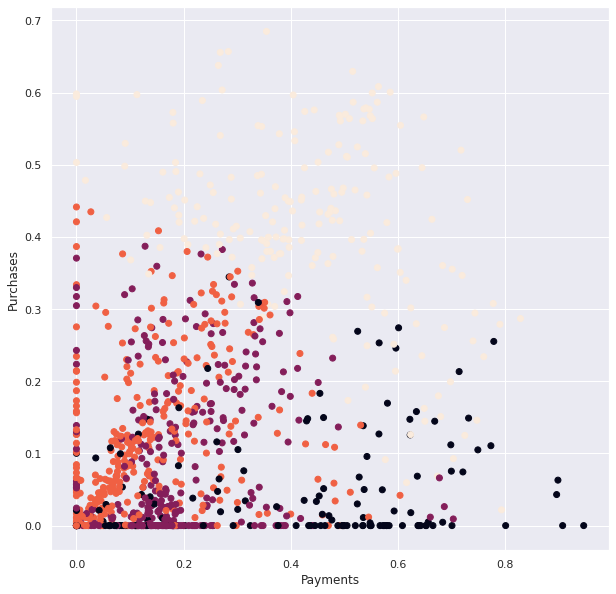

In [20]:
plt.figure(figsize = (10, 10))
plt.scatter(normalized_df['PAYMENTS'], normalized_df['PURCHASES'], c = kmeans.labels_)
plt.xlabel('Payments')
plt.ylabel('Purchases')

## Visualization of Dendrogram

So how does the Dedrogram look like for 4 clusters? 

Let's visualize it.

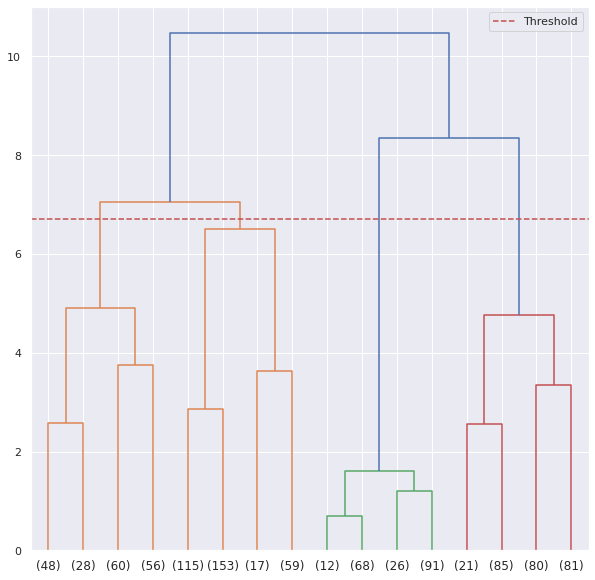

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (10, 10))
dendrogram(linkage(normalized_df, method = 'ward'), truncate_mode = 'level', p = 3)
plt.axhline(y = 6.7, linestyle = '--', color = 'r', label = 'Threshold')
plt.legend()
plt.show()

The threshold, marked by the red lines, shows us where we decided to stop the clustering using KMeans.

The observations near the top of the tree are different from each other, while the observations down the tree are similar to each other. By limiting the number of clusters to 4, we are effectively implementing a threshold that does not allow very similar groups of observations to be clustered together. 

The values on the x-axis in the paranthesis are the number of observations. It shows the number of observations in a given cluster; do not be mistaken - there are further subclusters which cannot be seen here.

# Agglomerative Clustering

We can now try the data with Agglomerative Clustering Technique.

In [22]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           1000 non-null   float64
 1   BALANCE_FREQUENCY                 1000 non-null   float64
 2   PURCHASES                         1000 non-null   float64
 3   ONEOFF_PURCHASES                  1000 non-null   float64
 4   INSTALLMENTS_PURCHASES            1000 non-null   float64
 5   CASH_ADVANCE                      1000 non-null   float64
 6   PURCHASES_FREQUENCY               1000 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        1000 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  1000 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            1000 non-null   float64
 10  CASH_ADVANCE_TRX                  1000 non-null   float64
 11  PURCHASES_TRX                     1000 non-null   float64
 12  CREDIT_

We do not use Elbow method for Agglomerative Clustering - we use Dendrograms to find the optimal number of clusters.

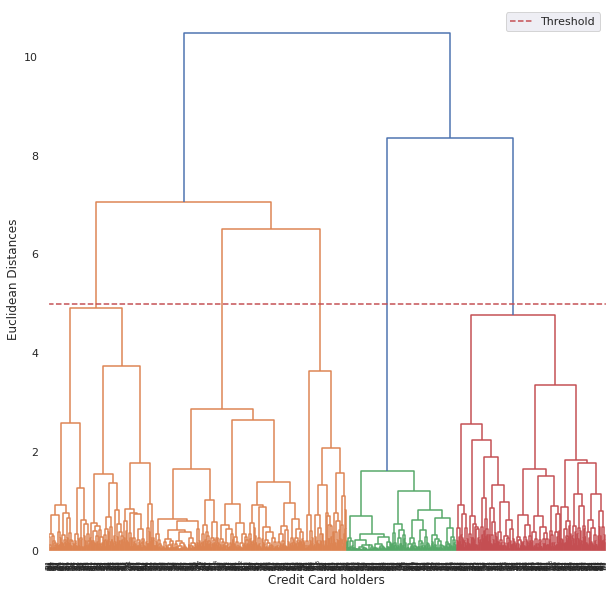

In [23]:
plt.figure(figsize = (10, 10))
dendrogram(linkage(normalized_df, method = 'ward'))
plt.axhline(y = 5, linestyle = '--', color = 'r', label = 'Threshold')
plt.legend()
plt.ylabel('Euclidean Distances')
plt.xlabel('Credit Card holders')
plt.show()

Essentially, we are to find the maximum distances in whose interval the split does not happen as our threshold and then count the branches above it to find the number of clusters we require. Here, although the distances are not too much, we can choose the 5 clusters that does not join between the distances 5 and 6.5 (approximately). This is an educated guess - that is all it is.

In [24]:
from sklearn.cluster import AgglomerativeClustering

agglomerative  = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
agglomerative.fit(normalized_df)
agglomerative.get_params()

{'affinity': 'euclidean',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 5}

We can now make the predictions:

In [25]:
y_clusters = agglomerative.fit_predict(normalized_df)

In [26]:
y_clusters

array([2, 0, 4, 1, 4, 3, 1, 4, 2, 2, 3, 1, 1, 1, 4, 4, 0, 2, 2, 3, 3, 1,
       0, 1, 4, 2, 3, 1, 4, 2, 4, 1, 4, 1, 3, 4, 0, 4, 4, 0, 0, 1, 4, 0,
       4, 4, 0, 4, 1, 2, 0, 1, 4, 1, 3, 1, 4, 1, 4, 4, 0, 4, 0, 1, 3, 4,
       4, 4, 0, 1, 4, 0, 0, 4, 2, 4, 2, 0, 3, 4, 2, 0, 2, 1, 1, 2, 4, 4,
       4, 4, 3, 0, 4, 4, 4, 3, 2, 4, 2, 2, 2, 1, 0, 2, 0, 4, 1, 4, 4, 0,
       2, 4, 4, 4, 1, 1, 1, 3, 2, 4, 1, 2, 1, 4, 4, 1, 0, 4, 4, 0, 1, 4,
       2, 0, 2, 1, 1, 1, 3, 4, 4, 0, 4, 4, 1, 4, 2, 2, 3, 2, 3, 1, 2, 1,
       1, 2, 1, 3, 1, 4, 4, 4, 1, 4, 1, 4, 2, 1, 3, 1, 0, 1, 2, 0, 4, 4,
       1, 3, 2, 2, 1, 2, 0, 2, 2, 1, 0, 3, 1, 0, 2, 2, 0, 4, 4, 1, 1, 2,
       2, 3, 2, 0, 2, 4, 1, 2, 0, 4, 4, 2, 4, 4, 0, 2, 2, 2, 1, 2, 3, 1,
       3, 1, 2, 4, 1, 2, 4, 1, 0, 1, 1, 3, 2, 4, 1, 4, 4, 2, 2, 4, 0, 1,
       1, 2, 1, 2, 2, 2, 0, 1, 0, 3, 2, 2, 4, 2, 2, 2, 4, 0, 1, 1, 1, 1,
       2, 3, 1, 4, 2, 1, 1, 4, 2, 1, 0, 2, 4, 2, 0, 1, 1, 3, 2, 3, 0, 0,
       4, 4, 2, 4, 2, 4, 1, 4, 2, 1, 0, 4, 4, 1, 4,

We can add the labels to the dataset:

In [27]:
agglomerative_clustered = normalized_df.copy()
agglomerative_clustered['CLUSTER'] = agglomerative.labels_

In [28]:
agglomerative_clustered['CLUSTER'].unique()

array([2, 0, 4, 1, 3])

In [29]:
agglomerative_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           1000 non-null   float64
 1   BALANCE_FREQUENCY                 1000 non-null   float64
 2   PURCHASES                         1000 non-null   float64
 3   ONEOFF_PURCHASES                  1000 non-null   float64
 4   INSTALLMENTS_PURCHASES            1000 non-null   float64
 5   CASH_ADVANCE                      1000 non-null   float64
 6   PURCHASES_FREQUENCY               1000 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        1000 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  1000 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            1000 non-null   float64
 10  CASH_ADVANCE_TRX                  1000 non-null   float64
 11  PURCHASES_TRX                     1000 non-null   float64
 12  CREDIT_

# Notes

1. We have only used a subset of the dataset which consists of details of over 5000 customers. Utilizing the whole dataset may result in a  completely different Elbow Graph as well as the Silhouette Plots and Dendrograms.
2. The newly created datasets could perhaps be used as a training data for the classification problems.